In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import random

In [104]:
cj=pd.read_csv('cj_olive')

In [105]:
cj

,DL_YM,DL_GD_LCLS_NM,DL_GD_LCLS_CD,DL_GD_MCLS_NM,DL_GD_MCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,EMD_NM,LGDNG_CD,INVC_CONT
0,202101,가구/인테리어,10,DIY자재/용품,1010,경상남도,48,통영시,48220,중앙동,4822010500,4
1,202101,가구/인테리어,10,수납가구,1013,전라북도,45,군산시,45130,동흥남동,4513013200,3
2,202101,가구/인테리어,10,아웃도어가구,1014,경상남도,48,통영시,48220,동호동,4822010800,3
3,202101,가구/인테리어,10,인테리어소품,1015,전라북도,45,군산시,45130,임피면 읍내리,4513033021,15
4,202101,가구/인테리어,10,침구단품,1017,전라북도,45,군산시,45130,경암동,4513013600,6
...,...,...,...,...,...,...,...,...,...,...,...,...
33114,202103,화장품/미용,19,클렌징,1918,전라북도,45,군산시,45130,오식도동,4513014700,21
33115,202103,화장품/미용,19,클렌징,1918,전라북도,45,군산시,45130,나포면 나포리,4513038021,5
33116,202103,화장품/미용,19,향수,1919,전라북도,45,군산시,45130,송풍동,4513010900,4
33117,202103,화장품/미용,19,헤어스타일링,1920,경상남도,48,통영시,48220,산양읍 미남리,4822025023,6


In [106]:
list(cj)

['DL_YM',
 'DL_GD_LCLS_NM',
 'DL_GD_LCLS_CD',
 'DL_GD_MCLS_NM',
 'DL_GD_MCLS_CD',
 'CTPV_NM',
 'CTPV_CD',
 'CTGG_NM',
 'CTGG_CD',
 'EMD_NM',
 'LGDNG_CD',
 'INVC_CONT']

In [107]:
cj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33119 entries, 0 to 33118
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DL_YM          33119 non-null  int64 
 1   DL_GD_LCLS_NM  33119 non-null  object
 2   DL_GD_LCLS_CD  33119 non-null  int64 
 3   DL_GD_MCLS_NM  33119 non-null  object
 4   DL_GD_MCLS_CD  33119 non-null  int64 
 5   CTPV_NM        33119 non-null  object
 6   CTPV_CD        33119 non-null  int64 
 7   CTGG_NM        33119 non-null  object
 8   CTGG_CD        33119 non-null  int64 
 9   EMD_NM         33119 non-null  object
 10  LGDNG_CD       33119 non-null  int64 
 11  INVC_CONT      33119 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 3.0+ MB


In [108]:
cj.describe()

,DL_YM,DL_GD_LCLS_CD,DL_GD_MCLS_CD,CTPV_CD,CTGG_CD,LGDNG_CD,INVC_CONT
count,33119.000000,33119.000000,33119.000000,33119.000000,33119.000000,3.311900e+04,33119.000000
mean,202102.015943,14.644222,1486.104532,46.138561,46292.593677,4.629278e+09,106.837586
std,0.822629,2.730927,273.680208,1.309370,1349.871560,1.349886e+08,341.748325
min,202101.000000,10.000000,1010.000000,45.000000,45130.000000,4.513010e+09,3.000000
25%,202101.000000,13.000000,1310.000000,45.000000,45130.000000,4.513014e+09,6.000000
50%,202102.000000,14.000000,1499.000000,46.000000,46110.000000,4.611010e+09,17.000000
75%,202103.000000,17.000000,1714.000000,48.000000,48220.000000,4.822011e+09,61.000000
max,202103.000000,19.000000,1999.000000,48.000000,48220.000000,4.822037e+09,6313.000000


In [109]:
category_range=set(cj['DL_GD_LCLS_NM'])
print(category_range, len(category_range))

{'스포츠/레저', '생활/건강', '식품', '패션의류', '디지털/가전', '가구/인테리어', '화장품/미용', '여행/문화', '출산/육아', '패션잡화'} 10


In [139]:
cj['구']=cj['CTGG_NM']
cj['동']=cj['EMD_NM']
cj['카테고리']=cj['DL_GD_LCLS_NM']
cj['월']=cj['DL_YM']
cj['송장개수']=cj['INVC_CONT']

In [111]:
tongyoung_data=cj[cj['구']=='통영시']
tongyoung_data.tail(10)


,DL_YM,DL_GD_LCLS_NM,DL_GD_LCLS_CD,DL_GD_MCLS_NM,DL_GD_MCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,EMD_NM,LGDNG_CD,INVC_CONT,구,동,카테고리
33101,202103,패션잡화,18,지갑,1822,경상남도,48,통영시,48220,무전동,4822011100,25,통영시,무전동,패션잡화
33102,202103,패션잡화,18,기타패션잡화,1899,경상남도,48,통영시,48220,광도면 죽림리,4822034024,114,통영시,광도면 죽림리,패션잡화
33103,202103,화장품/미용,19,남성화장품,1910,경상남도,48,통영시,48220,광도면 황리,4822034026,36,통영시,광도면 황리,화장품/미용
33105,202103,화장품/미용,19,바디케어,1912,경상남도,48,통영시,48220,광도면 덕포리,4822034021,5,통영시,광도면 덕포리,화장품/미용
33108,202103,화장품/미용,19,색조메이크업,1915,경상남도,48,통영시,48220,도천동,4822010100,64,통영시,도천동,화장품/미용
33109,202103,화장품/미용,19,색조메이크업,1915,경상남도,48,통영시,48220,산양읍 영운리,4822025021,10,통영시,산양읍 영운리,화장품/미용
33111,202103,화장품/미용,19,선케어,1916,경상남도,48,통영시,48220,항남동,4822010400,13,통영시,항남동,화장품/미용
33112,202103,화장품/미용,19,스킨케어,1917,경상남도,48,통영시,48220,평림동,4822011200,13,통영시,평림동,화장품/미용
33113,202103,화장품/미용,19,스킨케어,1917,경상남도,48,통영시,48220,욕지면 동항리,4822035021,33,통영시,욕지면 동항리,화장품/미용
33117,202103,화장품/미용,19,헤어스타일링,1920,경상남도,48,통영시,48220,산양읍 미남리,4822025023,6,통영시,산양읍 미남리,화장품/미용


In [112]:
print(len(tongyoung_data))

10334


In [113]:
groupdata=tongyoung_data.groupby('카테고리')
group_by_category=groupdata['카테고리']
category_count=group_by_category.count()
sorted_category_count=category_count.sort_values(ascending=False)
sorted_category_count

카테고리
생활/건강      1771
디지털/가전     1485
식품         1430
화장품/미용     1161
패션잡화       1021
가구/인테리어     897
패션의류        880
스포츠/레저      877
출산/육아       690
여행/문화       122
Name: 카테고리, dtype: int64

In [114]:
import matplotlib.pyplot as plt

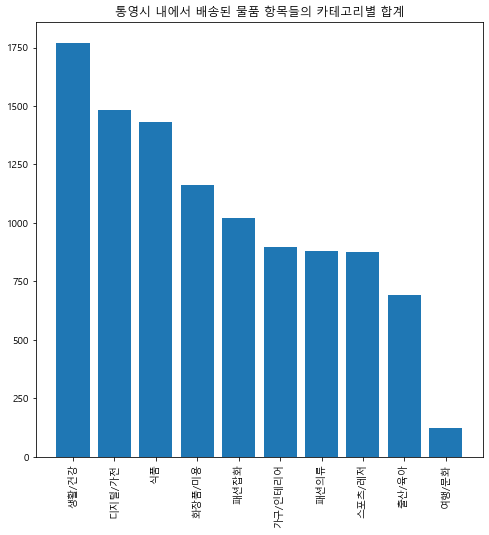

In [115]:
plt.rcParams['font.family']="Malgun Gothic"

plt.figure(figsize=(8,8))
plt.bar(sorted_category_count.index, sorted_category_count)
plt.title('통영시 내에서 배송된 물품 항목들의 카테고리별 합계')
plt.xticks(rotation=90)
plt.show()

In [116]:
gunsan_data=cj[cj['구']=='군산시']
gunsan_data.tail(10)


,DL_YM,DL_GD_LCLS_NM,DL_GD_LCLS_CD,DL_GD_MCLS_NM,DL_GD_MCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,EMD_NM,LGDNG_CD,INVC_CONT,구,동,카테고리
33096,202103,패션잡화,18,모자,1811,전라북도,45,군산시,45130,나운동,4513014400,311,군산시,나운동,패션잡화
33098,202103,패션잡화,18,선글라스/안경테,1813,전라북도,45,군산시,45130,개정동,4513013900,5,군산시,개정동,패션잡화
33100,202103,패션잡화,18,주얼리,1821,전라북도,45,군산시,45130,미룡동,4513014500,206,군산시,미룡동,패션잡화
33104,202103,화장품/미용,19,바디케어,1912,전라북도,45,군산시,45130,삼학동,4513011100,96,군산시,삼학동,화장품/미용
33106,202103,화장품/미용,19,뷰티소품,1914,전라북도,45,군산시,45130,선양동,4513011200,16,군산시,선양동,화장품/미용
33107,202103,화장품/미용,19,뷰티소품,1914,전라북도,45,군산시,45130,성산면 창오리,4513037027,4,군산시,성산면 창오리,화장품/미용
33110,202103,화장품/미용,19,선케어,1916,전라북도,45,군산시,45130,신풍동,4513010800,8,군산시,신풍동,화장품/미용
33114,202103,화장품/미용,19,클렌징,1918,전라북도,45,군산시,45130,오식도동,4513014700,21,군산시,오식도동,화장품/미용
33115,202103,화장품/미용,19,클렌징,1918,전라북도,45,군산시,45130,나포면 나포리,4513038021,5,군산시,나포면 나포리,화장품/미용
33116,202103,화장품/미용,19,향수,1919,전라북도,45,군산시,45130,송풍동,4513010900,4,군산시,송풍동,화장품/미용


In [117]:
gunsan_groupdata=gunsan_data.groupby('카테고리')
gunsan_group_by_category=gunsan_groupdata['카테고리']
gunsan_category_count=gunsan_group_by_category.count()
gunsan_sorted_category_count=gunsan_category_count.sort_values(ascending=False)
gunsan_sorted_category_count

카테고리
생활/건강      2777
디지털/가전     2392
식품         2106
화장품/미용     1874
패션잡화       1623
패션의류       1390
가구/인테리어    1370
스포츠/레저     1290
출산/육아      1071
여행/문화       186
Name: 카테고리, dtype: int64

In [118]:
gunsan_data.groupby('카테고리')

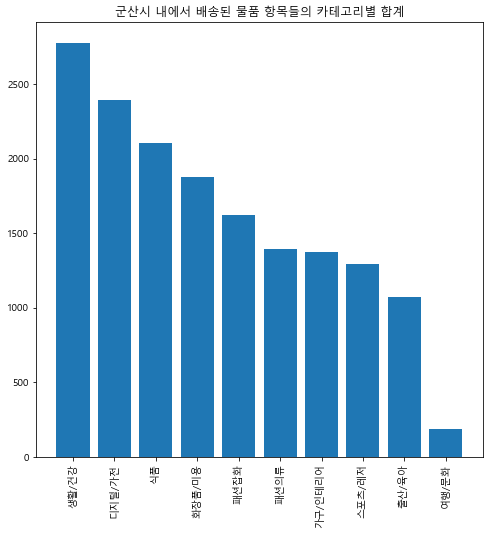

In [119]:
plt.rcParams['font.family']="Malgun Gothic"

plt.figure(figsize=(8,8))
plt.bar(gunsan_sorted_category_count.index, gunsan_sorted_category_count)
plt.title('군산시 내에서 배송된 물품 항목들의 카테고리별 합계')
plt.xticks(rotation=90)
plt.show()

In [120]:
mokpo_data=cj[cj['구']=='목포시']
gunsan_data.tail(10)


,DL_YM,DL_GD_LCLS_NM,DL_GD_LCLS_CD,DL_GD_MCLS_NM,DL_GD_MCLS_CD,CTPV_NM,CTPV_CD,CTGG_NM,CTGG_CD,EMD_NM,LGDNG_CD,INVC_CONT,구,동,카테고리
33096,202103,패션잡화,18,모자,1811,전라북도,45,군산시,45130,나운동,4513014400,311,군산시,나운동,패션잡화
33098,202103,패션잡화,18,선글라스/안경테,1813,전라북도,45,군산시,45130,개정동,4513013900,5,군산시,개정동,패션잡화
33100,202103,패션잡화,18,주얼리,1821,전라북도,45,군산시,45130,미룡동,4513014500,206,군산시,미룡동,패션잡화
33104,202103,화장품/미용,19,바디케어,1912,전라북도,45,군산시,45130,삼학동,4513011100,96,군산시,삼학동,화장품/미용
33106,202103,화장품/미용,19,뷰티소품,1914,전라북도,45,군산시,45130,선양동,4513011200,16,군산시,선양동,화장품/미용
33107,202103,화장품/미용,19,뷰티소품,1914,전라북도,45,군산시,45130,성산면 창오리,4513037027,4,군산시,성산면 창오리,화장품/미용
33110,202103,화장품/미용,19,선케어,1916,전라북도,45,군산시,45130,신풍동,4513010800,8,군산시,신풍동,화장품/미용
33114,202103,화장품/미용,19,클렌징,1918,전라북도,45,군산시,45130,오식도동,4513014700,21,군산시,오식도동,화장품/미용
33115,202103,화장품/미용,19,클렌징,1918,전라북도,45,군산시,45130,나포면 나포리,4513038021,5,군산시,나포면 나포리,화장품/미용
33116,202103,화장품/미용,19,향수,1919,전라북도,45,군산시,45130,송풍동,4513010900,4,군산시,송풍동,화장품/미용


In [121]:
mokpo_groupdata=mokpo_data.groupby('카테고리')
mokpo_group_by_category=mokpo_groupdata['카테고리']
mokpo_category_count=mokpo_group_by_category.count()
mokpo_sorted_category_count=mokpo_category_count.sort_values(ascending=False)
mokpo_sorted_category_count

카테고리
생활/건강      1086
디지털/가전     1070
식품          813
화장품/미용      731
패션잡화        706
스포츠/레저      644
가구/인테리어     590
패션의류        528
출산/육아       467
여행/문화        71
Name: 카테고리, dtype: int64

In [122]:
mokpo_data.groupby('카테고리')

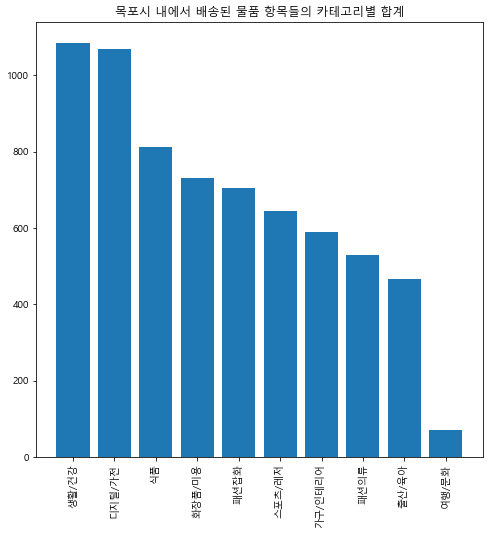

In [123]:
plt.rcParams['font.family']="Malgun Gothic"

plt.figure(figsize=(8,8))
plt.bar(mokpo_sorted_category_count.index, mokpo_sorted_category_count)
plt.title('목포시 내에서 배송된 물품 항목들의 카테고리별 합계')
plt.xticks(rotation=90)
plt.show()

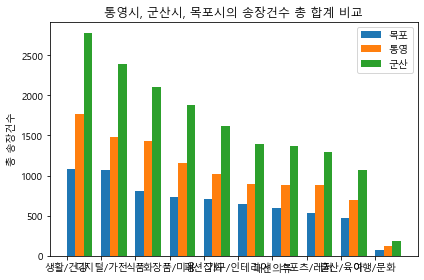

In [137]:

labels = sorted_category_count.index
tongyoung_result = sorted_category_count
gunsan_result = gunsan_sorted_category_count
mokpo_result = mokpo_sorted_category_count

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, mokpo_result, width, label='목포')
rects2 = ax.bar(x + 3*(width/2), tongyoung_result, width, label='통영')
rects3 = ax.bar(x + 5*(width/2), gunsan_result, width, label='군산')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('총 송장건수')
ax.set_title('통영시, 군산시, 목포시의 송장건수 총 합계 비교')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

## month별 데이터 분석 (통영)

In [147]:
tongyoung_month_groupdata=tongyoung_data.groupby('DL_YM')
tongyoung_month_group_by_category=tongyoung_month_groupdata['EMD_NM']
tongyoung_month_count=tongyoung_month_group_by_category.count()
tongyoung_month_sorted_category_count=tongyoung_month_count.sort_values(ascending=False)
tongyoung_month_sorted_category_count

DL_YM
202103    3566
202101    3428
202102    3340
Name: EMD_NM, dtype: int64